<a href="https://colab.research.google.com/github/Badr2211/Shai_intern/blob/main/Exam/ShAI_BootCamp_Assignment_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [ ]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

## Task 1 **Basic Data Exploration**:

1.1  Identify the number of rows and columns in the dataset

    - row = 148654
    - col = 13

In [ ]:
df.shape

(148654, 13)

1.2 determine the data types of each column , and check for missing values in each column.


In [ ]:
df.info() #both

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [ ]:
df.dtypes #types

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [ ]:
df.isna().sum() #null

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

## Tasks 2 : **Descriptive Statistics**


2.1 Calculate basic statistics mean, median, mode, minimum, and maximum salary

In [ ]:
df.describe()[['TotalPay']]

,TotalPay
count,148654.000000
mean,74768.321972
std,50517.005274
min,-618.130000
25%,36168.995000
50%,71426.610000
75%,105839.135000
max,567595.430000


2.2 determine the range of salaries, and find the standard deviation.



In [ ]:
np.ptp(df['TotalPay'])


568213.56

In [ ]:
df['TotalPay'].std()

50517.00527394987

## Task3 : **Data Cleaning**
 Handle missing data by suitable method with explain why you use it.


In [ ]:
#Explore each feature to determine best method which handle missing
def feature_insight(df,target):
    df_unique = pd .DataFrame([[
                    i,
                    df[i].unique(),
                    df[i].dtypes,
                    #df[i].corr(df[target]) if ( df[i].dtypes != 'object' and  df[target].dtypes != 'object') else None,
                    df[i].isna().sum(),
                    len(df[i].unique())]
                    for i in df.columns],columns=['Feature',
                                                  'Unique Values','dtype',
                                                  #'Corr with target',
                                                  'N.null','N.of unique values']).set_index('Feature')
    return df_unique

col_info = feature_insight(df,'TotalPay')
col_info

,Unique Values,dtype,N.null,N.of unique values
Feature,,,,
Id,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",int64,0,148654
EmployeeName,"[NATHANIEL FORD, GARY JIMENEZ, ALBERT PARDINI,...",object,0,110811
JobTitle,[GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORIT...,object,0,2159
BasePay,"[167411.18, 155966.02, 212739.13, 77916.0, 134...",float64,609,109490
OvertimePay,"[0.0, 245131.88, 106088.18, 56120.71, 9737.0, ...",float64,4,65999
OtherPay,"[400184.25, 137811.38, 16452.6, 198306.9, 1822...",float64,4,83226
Benefits,"[nan, 44430.12, 69810.19, 53102.29, 72047.88, ...",float64,36163,98466
TotalPay,"[567595.43, 538909.28, 335279.91, 332343.61, 3...",float64,0,138486
TotalPayBenefits,"[567595.43, 538909.28, 335279.91, 332343.61, 3...",float64,0,142098


In [ ]:
col_info[col_info['N.null']>0] #all the null value in(numerical feature) float

,Unique Values,dtype,N.null,N.of unique values
Feature,,,,
BasePay,"[167411.18, 155966.02, 212739.13, 77916.0, 134...",float64,609,109490
OvertimePay,"[0.0, 245131.88, 106088.18, 56120.71, 9737.0, ...",float64,4,65999
OtherPay,"[400184.25, 137811.38, 16452.6, 198306.9, 1822...",float64,4,83226
Benefits,"[nan, 44430.12, 69810.19, 53102.29, 72047.88, ...",float64,36163,98466
Notes,[nan],float64,148654,1
Status,[nan],float64,148654,1


#### drop whole col [Notes , Status] because it`s not contain any valid data


In [ ]:
#drop whole col [Notes , Status] because it`s not contain any valid data
df.drop(['Notes','Status'],axis=1,inplace=True)

In [ ]:
col_info = feature_insight(df,'TotalPay')
miss= col_info[col_info['N.null']>0] #
miss

,Unique Values,dtype,N.null,N.of unique values
Feature,,,,
BasePay,"[167411.18, 155966.02, 212739.13, 77916.0, 134...",float64,609,109490
OvertimePay,"[0.0, 245131.88, 106088.18, 56120.71, 9737.0, ...",float64,4,65999
OtherPay,"[400184.25, 137811.38, 16452.6, 198306.9, 1822...",float64,4,83226
Benefits,"[nan, 44430.12, 69810.19, 53102.29, 72047.88, ...",float64,36163,98466


#### with other missing value we have multi choice like : replace by mean or by cons  (0) ...etc
#### the best chocie if we use ML algorithm to determine nearest value and replace it
#### we can determine choice based on impotance of the feature and the type

In [ ]:
for c in miss.index:
    df[c].fillna(df[c].mean(),inplace=True)



In [ ]:
col_info = feature_insight(df,'TotalPay')
col_info[col_info['N.null']>0] #

,Unique Values,dtype,N.null,N.of unique values
Feature,,,,


#### now we dont have any missing values


## Task4. :Basic Data Visualization


#### 4.1 Create histograms or bar charts to visualize the distribution of salaries

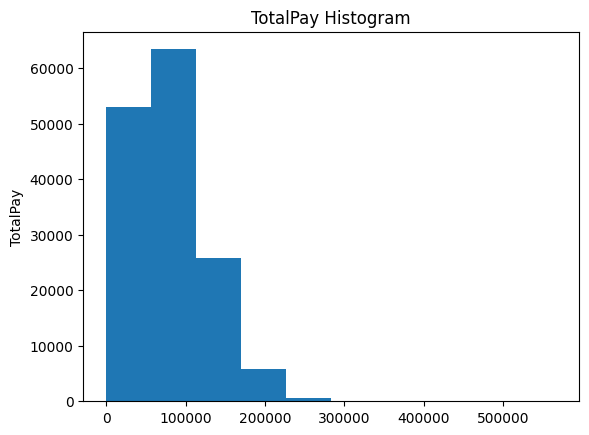

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['TotalPay'])
plt.title('TotalPay Histogram')
plt.ylabel('TotalPay')
plt.show()

#### 4.2 use pie charts to represent the proportion of employees in different departments.

In [ ]:
pie=df['JobTitle'].value_counts()
pie.head(20)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Custodian                       2418
TRANSIT OPERATOR                2388
Firefighter                     2359
Recreation Leader               1971
Patient Care Assistant          1945
Deputy Sheriff                  1933
Police Officer                  1476
SPECIAL NURSE                   1402
Public Service Trainee          1328
REGISTERED NURSE                1219
Police Officer 2                1141
Attorney (Civil/Criminal)       1126
Porter                          1095
Sergeant 3                      1047
General Laborer                 1033
Name: JobTitle, dtype: int64

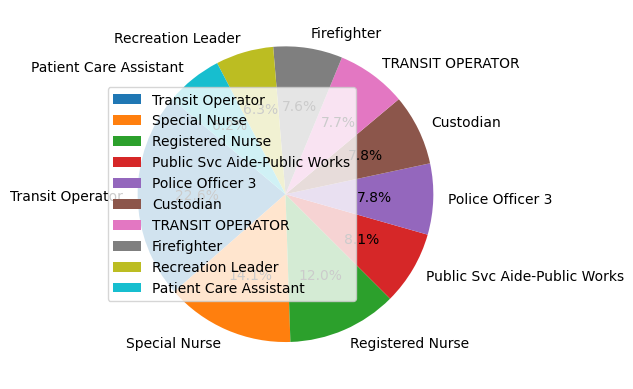

In [ ]:
pie=df['JobTitle'].value_counts().head(10)

plt.pie(pie, labels=pie.index, autopct='%1.1f%%', startangle=140)

plt.legend()
plt.show()


## Task 5. Grouped Analysis

Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.


In [ ]:
df[['Year','TotalPay']].groupby('Year',as_index=False).describe()

Year                                                      TotalPay  \
     count    mean  std     min     25%     50%     75%     max    count   
0  36159.0  2011.0  0.0  2011.0  2011.0  2011.0  2011.0  2011.0  36159.0   
1  36766.0  2012.0  0.0  2012.0  2012.0  2012.0  2012.0  2012.0  36766.0   
2  37606.0  2013.0  0.0  2013.0  2013.0  2013.0  2013.0  2013.0  37606.0   
3  38123.0  2014.0  0.0  2014.0  2014.0  2014.0  2014.0  2014.0  38123.0   

                                                                          \
           mean           std     min         25%        50%         75%   
0  71744.103871  47498.706594    0.00  36810.7600  68213.240  102512.680   
1  74113.262265  49523.904319    0.00  37560.6075  70714.680  104099.170   
2  77611.443142  52854.774783    0.00  36754.9950  74500.015  109637.670   
3  75463.918140  51697.713029 -618.13  33436.2100  72359.980  107974.445   

              
         max  
0  567595.43  
1  362844.66  
2  347102.32  
3  471952.64

In [ ]:
average_salary_comparison = df.groupby('Year')['TotalPay'].mean().sort_values(ascending=False)
average_salary_comparison

Year
2013    77611.443142
2014    75463.918140
2012    74113.262265
2011    71744.103871
Name: TotalPay, dtype: float64

## Task6 Simple Correlation Analysis
 Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.


In [ ]:
numeric_columns = df.select_dtypes(exclude=['object']).columns
corr=df[numeric_columns].corr()
corr

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
Id,1.000000,-0.204628,-0.081502,-0.100399,-0.229712,-0.211478,-0.092190,0.968171
BasePay,-0.204628,1.000000,0.266633,0.283760,0.806665,0.950514,0.942999,0.033737
OvertimePay,-0.081502,0.266633,1.000000,0.316592,0.268539,0.504844,0.467967,0.027886
OtherPay,-0.100399,0.283760,0.316592,1.000000,0.203621,0.470482,0.422328,-0.002499
Benefits,-0.229712,0.806665,0.268539,0.203621,1.000000,0.782687,0.843039,-0.027393
TotalPay,-0.211478,0.950514,0.504844,0.470482,0.782687,1.000000,0.977313,0.032090
TotalPayBenefits,-0.092190,0.942999,0.467967,0.422328,0.843039,0.977313,1.000000,0.151947
Year,0.968171,0.033737,0.027886,-0.002499,-0.027393,0.032090,0.151947,1.000000


In [ ]:
corr.loc['TotalPay','BasePay']

0.9505142922626332

corr val ranges from -1 to 1, where:
  - 1 indicates a perfect positive linear relationship,
  - -1 indicates a perfect negative linear relationship,
  - 0 indicates no linear relationship.

the sign of the correlation coefficient is the same as the sign of the slope :

  - If the correlation is positive, the slope is positive, indicating a positive linear relationship.
  - If the correlation is negative, the slope is negative, indicating a negative linear relationship.


In [ ]:
import seaborn as sns

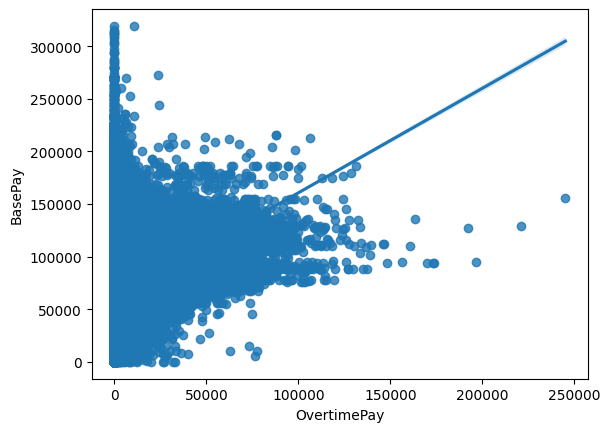

In [ ]:
sns.regplot(x='OvertimePay',y='BasePay',data=df)
plt.show()

# 8- Summary of Insights

## Employee Compensation Analysis

### Total Pay and Benefits Distribution

- The distribution of TotalPayBenefits suggests that a significant number of employees have a compensation value close to multiples of 100,000.

### Overtime Pay Distribution

- The majority of employees (77,321) did not receive any overtime pay during the recorded period.

### Other Pay Distribution

- A substantial number of employees (41,600) did not receive any additional pay beyond their base salary.

## Base Salary by Job Title

- 'ACCOUNT CLERK' has an average base salary of approximately $43,300.
- 'ACCOUNTANT' has an average base salary of approximately $46,643.
- 'ACCOUNTANT INTERN' has an average base salary of approximately $28,732.
- 'ACPO,JuvP, Juv Prob (SFERS)' has a base salary of approximately $62,290.
- 'ACUPUNCTURIST' has a base salary of approximately $66,374.

## Highest Salary Department

- Account department has  the highest salary department.

## The top six job titles and their counts:
- Transit Operator: 7,036
- Special Nurse: 4,389
- Registered Nurse: 3,736
- Public Svc Aide-Public Works: 2,518
- Police Officer 3: 2,421
- Custodian: 2,418

## details
To provide the report above
I use some step to get more insights
You can see details below:

In [ ]:

def num(data): # countinuse data
    num_feature=[i for  i in data.columns  if data[i].dtype =='float']
    return num_feature

def cat(data): #categorical col & int col
    cat_feature=[i for  i in data.columns  if data[i].dtype !='float']
    return cat_feature

In [ ]:
num_col=num(df)
cat_col=cat(df)
num_col,cat_col

(['BasePay',
  'OvertimePay',
  'OtherPay',
  'Benefits',
  'TotalPay',
  'TotalPayBenefits'],
 ['Id', 'EmployeeName', 'JobTitle', 'Year', 'Agency'])

#### Uni analysis

In [ ]:
col_info

,Unique Values,dtype,N.null,N.of unique values
Feature,,,,
Id,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",int64,0,148654
EmployeeName,"[NATHANIEL FORD, GARY JIMENEZ, ALBERT PARDINI,...",object,0,110811
JobTitle,[GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORIT...,object,0,2159
BasePay,"[167411.18, 155966.02, 212739.13, 77916.0, 134...",float64,0,109490
OvertimePay,"[0.0, 245131.88, 106088.18, 56120.71, 9737.0, ...",float64,0,65999
OtherPay,"[400184.25, 137811.38, 16452.6, 198306.9, 1822...",float64,0,83226
Benefits,"[25007.893150829852, 44430.12, 69810.19, 53102...",float64,0,98466
TotalPay,"[567595.43, 538909.28, 335279.91, 332343.61, 3...",float64,0,138486
TotalPayBenefits,"[567595.43, 538909.28, 335279.91, 332343.61, 3...",float64,0,142098


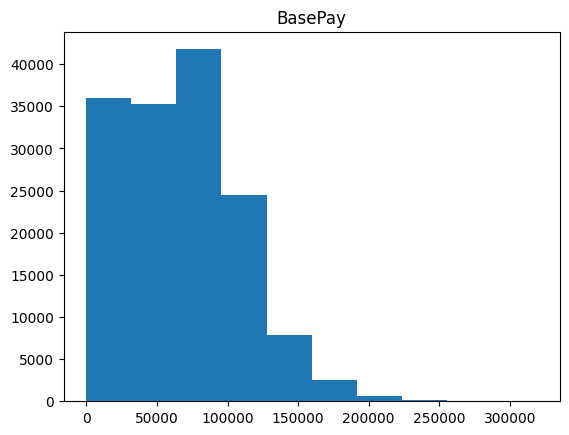

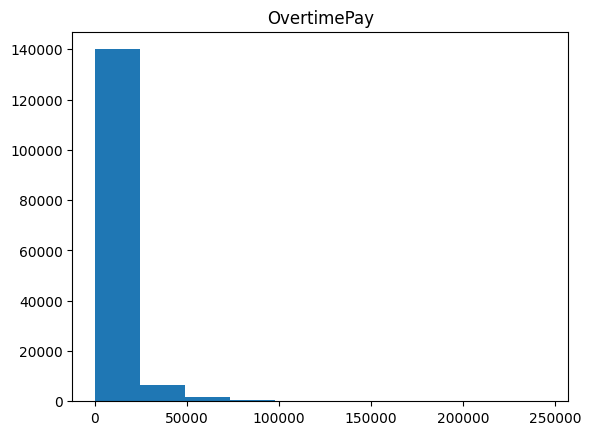

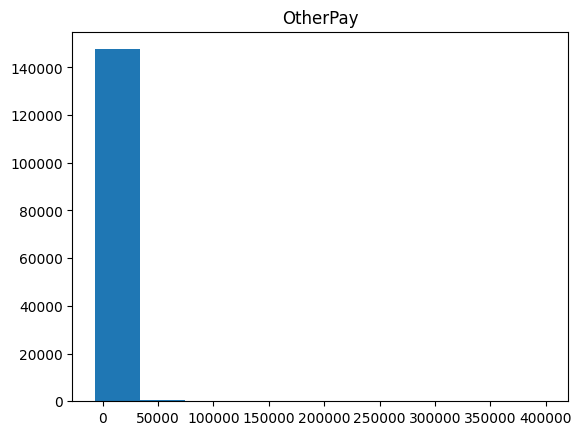

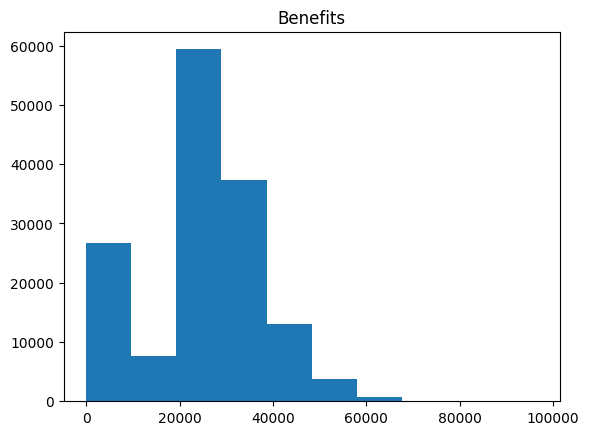

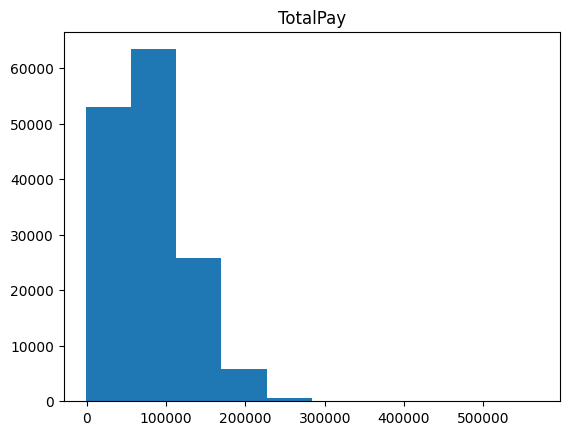

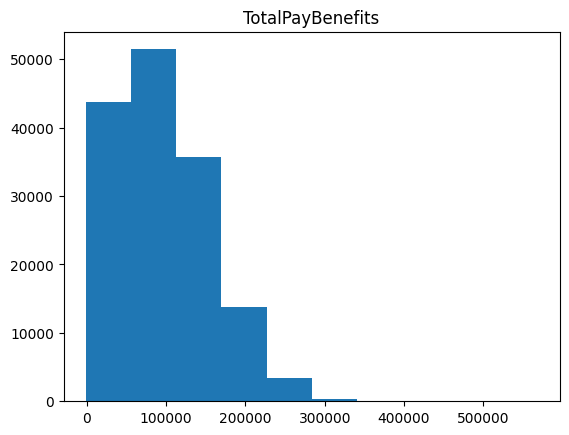

In [ ]:
for c in num_col :
    plt.hist(df[c])
    plt.title(c)
    plt.show()

the TotalPay and TotalPayBenefits columns have the same distribution, it implies that the benefits component for each employee is not significantly varying or contributing substantially to the overall compensation. In other words, the distribution pattern of total pay remains consistent when benefits are included.

most employees(50000) in the company have a TotalPayBenefits value that is approximately a multiple of 100,000

In [ ]:
df['OvertimePay'].value_counts()

0.00        77321
681.23         41
10.68          41
152.13         38
1314.78        27
            ...  
11127.49        1
4929.13         1
28932.63        1
18914.34        1
39554.08        1
Name: OvertimePay, Length: 65999, dtype: int64

large number of employees did not receive any overtime pay during the recorded period, and only a relatively small number received non-zero values for overtime pay.

In [ ]:
df['OtherPay'].value_counts()

 0.00       41600
 624.00      2092
 250.00       907
 648.00       739
 3486.00      516
            ...  
 5767.07        1
 1753.26        1
 3271.00        1
 9120.78        1
-618.13         1
Name: OtherPay, Length: 83226, dtype: int64

substantial number of entries (41,600) have a value of 0.00, indicating that many employees did not receive any additional pay or bonuses during the recorded period

In [ ]:
df['Benefits'].value_counts()

25007.893151    36163
0.000000         1734
7959.180000       348
4659.360000       107
25699.200000       83
                ...  
753.700000          1
1073.310000         1
662.980000          1
809.560000          1
1.240000            1
Name: Benefits, Length: 98466, dtype: int64

#### question
1298 emploee have 0 as basesalary

In [ ]:
df['BasePay'].value_counts()

0.00000        1298
66325.44884     609
54703.00000     338
55026.00000     297
48472.40000     210
               ... 
65402.73000       1
68818.72000       1
73810.54000       1
56242.68000       1
15.50000          1
Name: BasePay, Length: 109490, dtype: int64

In [ ]:
df[df['BasePay']==0]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
2896,2897,JOHN PAYNE,MANAGER VII,0.0,0.00,142245.22,25007.893151,142245.22,142245.22,2011,San Francisco
3263,3264,LAWRENCE BADINER,MANAGER VI,0.0,0.00,138191.99,25007.893151,138191.99,138191.99,2011,San Francisco
19058,19059,PETER LEONARD,FIRE FIGHTER PARAMEDIC,0.0,1630.20,64356.03,25007.893151,65986.23,65986.23,2011,San Francisco
20834,20835,MICHAEL COLLINS,POLICE OFFICER II,0.0,7815.78,52820.77,25007.893151,60636.55,60636.55,2011,San Francisco
21658,21659,LINDA ZIMMERMAN,PUBLIC HEALTH NURSE,0.0,0.00,58441.60,25007.893151,58441.60,58441.60,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
148645,148646,Carolyn A Wilson,Human Services Technician,0.0,0.00,0.00,0.000000,0.00,0.00,2014,San Francisco
148647,148648,Joann Anderson,Communications Dispatcher 2,0.0,0.00,0.00,0.000000,0.00,0.00,2014,San Francisco
148648,148649,Leon Walker,Custodian,0.0,0.00,0.00,0.000000,0.00,0.00,2014,San Francisco
148649,148650,Roy I Tillery,Custodian,0.0,0.00,0.00,0.000000,0.00,0.00,2014,San Francisco


employee has a BasePay of 0 but OtherPay is more than 0, it could indicate that the employee is receiving compensation or additional payments through sources other than their regular salary. This might include bonuses, incentives, or other forms of supplementary income.

In [ ]:

df[(df['BasePay'] == 0) & (df['TotalPay'] == 0)]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
36156,36157,PAULETTE ADAMS,"STATIONARY ENGINEER, WATER TREATMENT PLANT",0.0,0.0,0.0,25007.893151,0.0,0.00,2011,San Francisco
36157,36158,KAUKAB MOHSIN,TRANSIT OPERATOR,0.0,0.0,0.0,25007.893151,0.0,0.00,2011,San Francisco
36158,36159,JOSEPHINE MCCREARY,MANAGER IV,0.0,0.0,0.0,25007.893151,0.0,0.00,2011,San Francisco
70877,70878,Roland Baylon,Deputy Court Clerk II,0.0,0.0,0.0,3728.050000,0.0,3728.05,2012,San Francisco
70927,70928,Felecia Phillips,Registered Nurse,0.0,0.0,0.0,3618.130000,0.0,3618.13,2012,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
148644,148645,Randy D Winn,"Stationary Eng, Sewage Plant",0.0,0.0,0.0,0.000000,0.0,0.00,2014,San Francisco
148645,148646,Carolyn A Wilson,Human Services Technician,0.0,0.0,0.0,0.000000,0.0,0.00,2014,San Francisco
148647,148648,Joann Anderson,Communications Dispatcher 2,0.0,0.0,0.0,0.000000,0.0,0.00,2014,San Francisco
148648,148649,Leon Walker,Custodian,0.0,0.0,0.0,0.000000,0.0,0.00,2014,San Francisco


76 employee has a TotalPay value of 0, it suggests that this employee did not receive any monetary compensation for the specified period, or their compensation was entirely offset by deductions or negative pay components such as taxes or other financial adjustments. It could also indicate errors or missing data in the dataset.

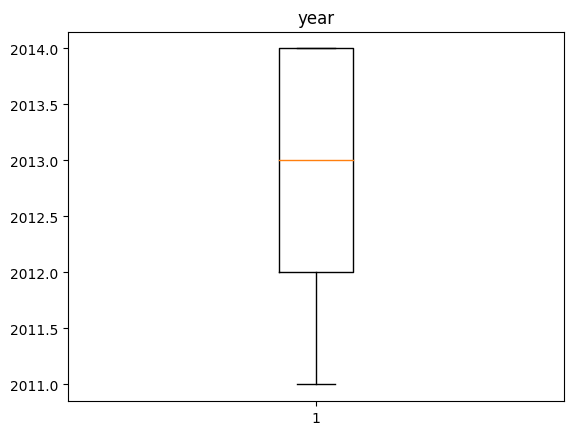

In [ ]:

plt.boxplot(df['Year'])
plt.title('year')
plt.show()

In [ ]:
df['JobTitle'].value_counts()

Transit Operator                                  7036
Special Nurse                                     4389
Registered Nurse                                  3736
Public Svc Aide-Public Works                      2518
Police Officer 3                                  2421
                                                  ... 
CHIEF HOUSING INSPECTOR                              1
TRAFFIC SIGNAL OPERATOR                              1
COURT COMPUTER FACILITIES COORDINATOR                1
AUTOMOTIVE BODY AND FENDER WORKER SUPERVISOR I       1
VICTIM & WITNESS TECHNICIAN                          1
Name: JobTitle, Length: 2159, dtype: int64

#bi analysis

In [ ]:

def group(data, g_based,agg):

    # Specify multiple aggregation functions
    fun = {
        'mean': np.mean,
        'sum': np.sum,
        'min': np.min,
        'max': np.max
    }

    # Perform groupby and calculate multiple aggregations
    g = data.groupby(g_based, as_index=False).agg(fun[agg])


    return g

In [ ]:

group1=df[['JobTitle','BasePay']]
jobtitle=group(group1,['JobTitle'],'mean')
jobtitle

,JobTitle,BasePay
0,ACCOUNT CLERK,43300.806506
1,ACCOUNTANT,46643.172000
2,ACCOUNTANT INTERN,28732.663958
3,"ACPO,JuvP, Juv Prob (SFERS)",62290.780000
4,ACUPUNCTURIST,66374.400000
...,...,...
2154,X-RAY LABORATORY AIDE,47664.773077
2155,X-Ray Laboratory Aide,46086.387100
2156,"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",52609.910000
2157,Youth Comm Advisor,39077.957500


Account department has  the highest salary department

analysis employee dont get any benefits

In [ ]:
ben=df['Benefits'].value_counts()#.plot.bar()
ben[0]

1734

In [ ]:

def corrplot(data):
    numeric_columns = data.select_dtypes(exclude=['object']).columns
    corr_matrix = data[numeric_columns].corr()

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=ax)
    plt.title('Correlation Heatmap')
    plt.show(fig)

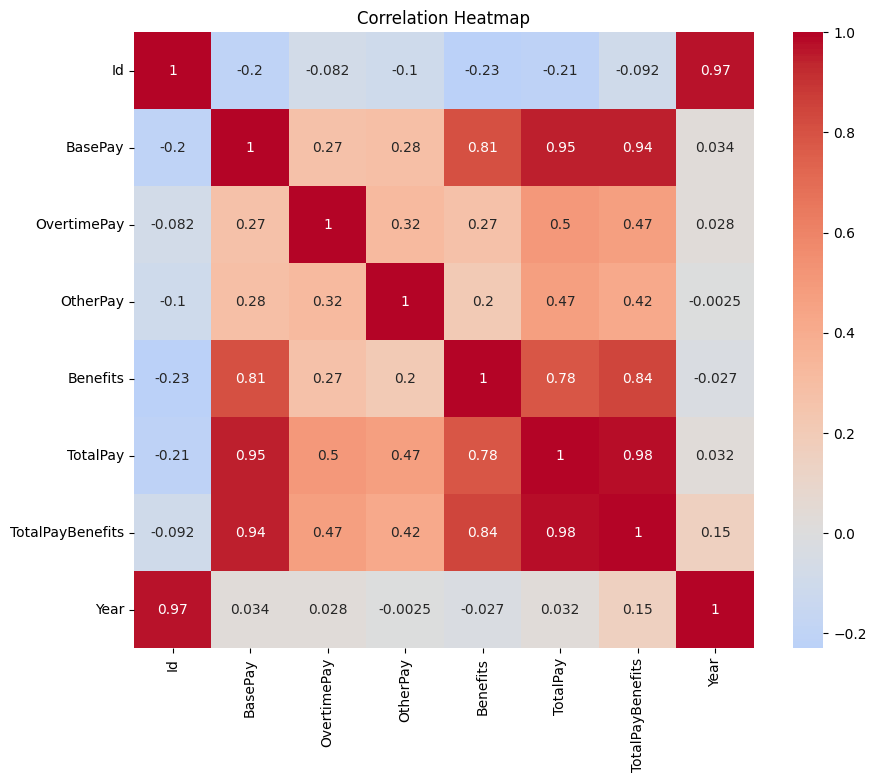

In [ ]:
corrplot(df)

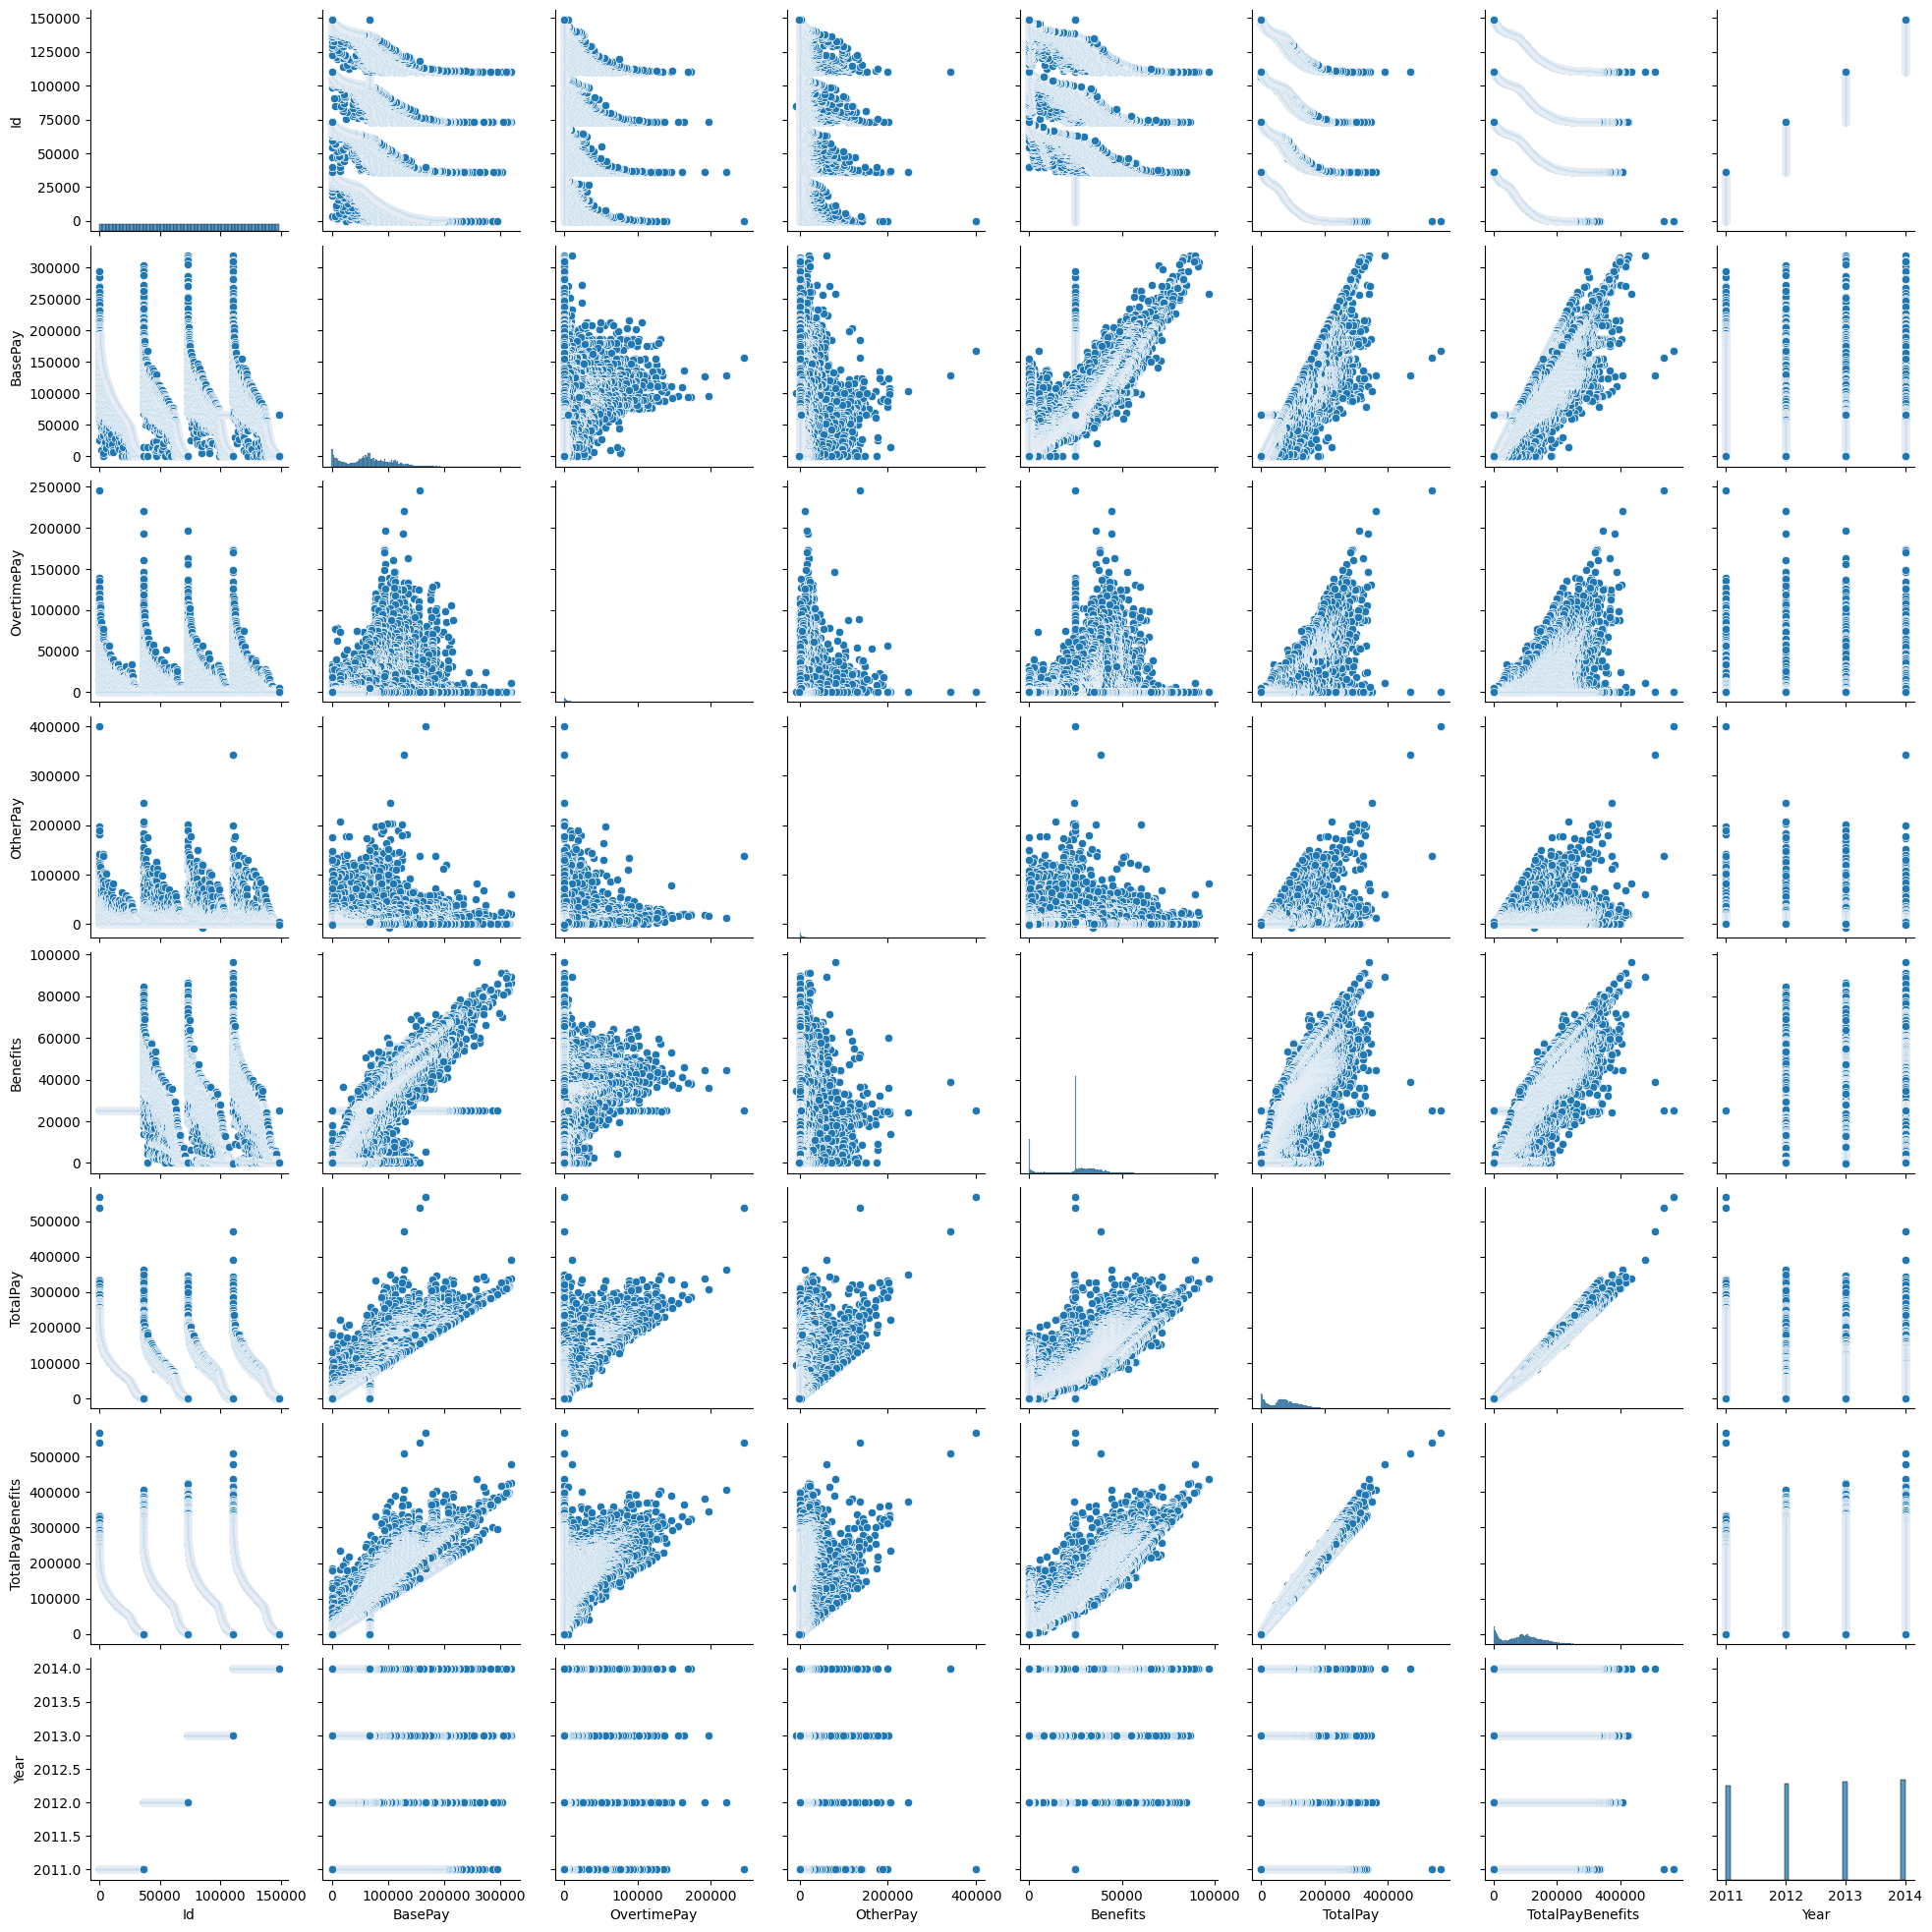

In [ ]:
sns.pairplot(df)